# **Telco Customer Churn Prediction Project**

## **1. Introduction**
This notebook analyzes customer churn data to identify patterns, build predictive models,
and provide actionable business recommendations.

Churn prediction helps businesses proactively retain customers by identifying those most at risk of leaving.  
This project includes:
- Exploratory Data Analysis (EDA)
- Data preprocessing
- Model training and evaluation
- Feature importance analysis
- Business recommendations

## **2. Data Loading & Overview**
In this section, we load the dataset and inspect its structure.  
Understanding the shape, types, and completeness of the data is crucial before proceeding with analysis.

In [1]:
import pandas as pd
df = pd.read_csv("/content/WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [2]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [4]:
df.drop('customerID', axis=1,inplace=True)

In [5]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [6]:
df.dtypes

,0
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object
OnlineSecurity,object
OnlineBackup,object


In [7]:
df.shape

(7043, 20)

In [8]:
pd.to_numeric(df.TotalCharges, errors='coerce').isnull()

,TotalCharges
0,False
1,False
2,False
3,False
4,False
...,...
7038,False
7039,False
7040,False
7041,False


In [9]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
print(df['TotalCharges'].dtype)

float64


In [10]:
df.isnull().sum()

,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0
OnlineBackup,0


In [11]:
df = df.dropna(subset=['TotalCharges'])

In [12]:
df.shape

(7032, 20)

## **3. Exploratory Data Analysis (EDA)**
We explore the dataset visually to identify trends and relationships between variables and churn.  
Each plot will be followed by an interpretation of the insights.

Visualization

Text(0.5, 1.0, 'Churn visualization')

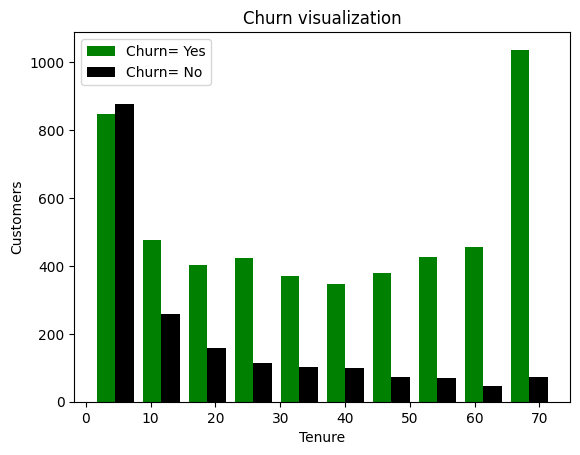

In [13]:
import matplotlib.pyplot as plt

tenure_churn_no = df[df.Churn=='No'].tenure
tenure_churn_yes = df[df.Churn=='Yes'].tenure
plt.hist([tenure_churn_no, tenure_churn_yes], color= ['green', 'black'], label=['Churn= Yes', 'Churn= No'])
plt.legend()
plt.xlabel("Tenure")
plt.ylabel("Customers")
plt.title("Churn visualization")

The bar chart reveals that customer churn is most frequent within the first 10 months, indicating a need to improve early customer experience. Churn then stabilizes across middle-tenure periods but rises again sharply at 70 months, possibly due to contract expirations or lifecycle-related issues. This suggests the business should focus on onboarding support and engagement strategies for both new and long-term customers.

Text(0.5, 1.0, 'Churn visualization')

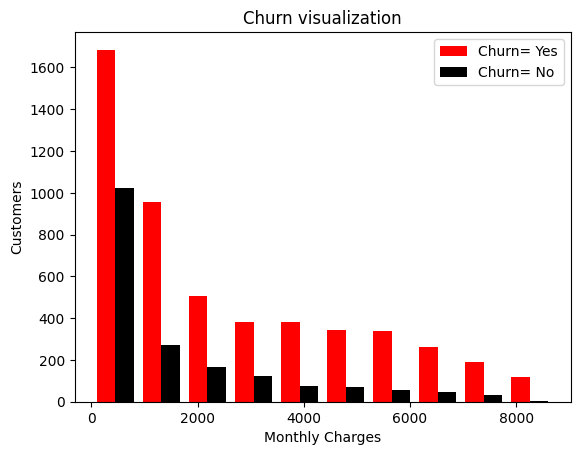

In [14]:
customer_churn_no = df[df.Churn=='No'].TotalCharges
customer_churn_yes = df[df.Churn=='Yes'].TotalCharges
plt.hist([customer_churn_no, customer_churn_yes], color= ['red', 'black'], label=['Churn= Yes', 'Churn= No'])
plt.legend()
plt.xlabel("Monthly Charges")
plt.ylabel("Customers")
plt.title("Churn visualization")

From the chart, we observe that as monthly charges increase, the number of customers who churn decreases. The majority of churn occurs at lower monthly charge levels, while customers with higher charges tend to stay. This suggests that customers paying more are more committed or perceive higher value, indicating that monthly charges may be a strong factor in predicting churn behavior.

It would be useful to explore whether high-paying customers are under long-term contracts or receive better support.

In [15]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## **4. Data Preprocessing**
We clean and transform the dataset to prepare it for modeling.  
Steps may include:
- Handling missing values
- Encoding categorical variables
- Scaling features
- Splitting data into training/testing sets

In [16]:
df1 = {col: df[col].unique().tolist() for col in df}
print(df1)

{'gender': ['Female', 'Male'], 'SeniorCitizen': [0, 1], 'Partner': ['Yes', 'No'], 'Dependents': ['No', 'Yes'], 'tenure': [1, 34, 2, 45, 8, 22, 10, 28, 62, 13, 16, 58, 49, 25, 69, 52, 71, 21, 12, 30, 47, 72, 17, 27, 5, 46, 11, 70, 63, 43, 15, 60, 18, 66, 9, 3, 31, 50, 64, 56, 7, 42, 35, 48, 29, 65, 38, 68, 32, 55, 37, 36, 41, 6, 4, 33, 67, 23, 57, 61, 14, 20, 53, 40, 59, 24, 44, 19, 54, 51, 26, 39], 'PhoneService': ['No', 'Yes'], 'MultipleLines': ['No phone service', 'No', 'Yes'], 'InternetService': ['DSL', 'Fiber optic', 'No'], 'OnlineSecurity': ['No', 'Yes', 'No internet service'], 'OnlineBackup': ['Yes', 'No', 'No internet service'], 'DeviceProtection': ['No', 'Yes', 'No internet service'], 'TechSupport': ['No', 'Yes', 'No internet service'], 'StreamingTV': ['No', 'Yes', 'No internet service'], 'StreamingMovies': ['No', 'Yes', 'No internet service'], 'Contract': ['Month-to-month', 'One year', 'Two year'], 'PaperlessBilling': ['Yes', 'No'], 'PaymentMethod': ['Electronic check', 'Maile

In [17]:
df.replace("No internet service", 'No', inplace=True)
df.replace("No phone service", 'No', inplace=True)

In [18]:
yes_no_columns = ['Partner','Churn', 'Dependents', 'MultipleLines','PhoneService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling']
for col in yes_no_columns:
    df[col].replace({'Yes':1, "No":0}, inplace=True)

/tmp/ipython-input-1348156887.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].replace({'Yes':1, "No":0}, inplace=True)
/tmp/ipython-input-1348156887.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[col].replace({'Yes':1, "No":0}, inplace=True)


In [19]:
gender_column = ['gender']
for col in gender_column:
    df[col].replace({'Female': 1, 'Male': 0}, inplace=True)

/tmp/ipython-input-3590912882.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].replace({'Female': 1, 'Male': 0}, inplace=True)
/tmp/ipython-input-3590912882.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[col].replace({'Female': 1, 'Male': 0}, inplace=True)


In [20]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1,0,1,0,1,0,0,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,0,0,0,0,34,1,0,DSL,1,0,1,0,0,0,One year,0,Mailed check,56.95,1889.50,0
2,0,0,0,0,2,1,0,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,0,0,0,0,45,0,0,DSL,1,0,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,1,0,0,0,2,1,0,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1


In [21]:
df.dtypes

,0
gender,int64
SeniorCitizen,int64
Partner,int64
Dependents,int64
tenure,int64
PhoneService,int64
MultipleLines,int64
InternetService,object
OnlineSecurity,int64
OnlineBackup,int64


In [22]:
df2 = pd.get_dummies(df, columns=['InternetService', 'Contract', 'PaymentMethod'], drop_first=True)
df2 = df2.astype(int)

In [23]:
df2.dtypes

,0
gender,int64
SeniorCitizen,int64
Partner,int64
Dependents,int64
tenure,int64
PhoneService,int64
MultipleLines,int64
OnlineSecurity,int64
OnlineBackup,int64
DeviceProtection,int64


In [24]:
df2.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,MonthlyCharges,TotalCharges,Churn,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,1,0,0,0,1,0,...,29,29,0,0,0,0,0,0,1,0
1,0,0,0,0,34,1,0,1,0,1,...,56,1889,0,0,0,1,0,0,0,1
2,0,0,0,0,2,1,0,1,1,0,...,53,108,1,0,0,0,0,0,0,1
3,0,0,0,0,45,0,0,1,0,1,...,42,1840,0,0,0,1,0,0,0,0
4,1,0,0,0,2,1,0,0,0,0,...,70,151,1,1,0,0,0,0,1,0


In [25]:
from sklearn.preprocessing import MinMaxScaler

cols_to_scale = ['tenure', 'MonthlyCharges', 'TotalCharges']
scaler = MinMaxScaler()
df2[cols_to_scale] = scaler.fit_transform(df2[cols_to_scale])
df2.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,MonthlyCharges,TotalCharges,Churn,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
5035,0,0,0,0,0.267606,1,0,0,0,0,...,0.60,0.187284,0,1,0,0,0,0,1,0
2910,1,0,1,1,0.478873,1,1,0,0,0,...,0.07,0.107431,0,0,1,0,1,1,0,0
6658,0,1,0,0,0.366197,1,1,0,1,0,...,0.63,0.242788,1,1,0,0,0,0,1,0
2806,0,0,1,0,0.802817,1,1,1,1,1,...,0.68,0.562197,0,0,0,0,1,0,1,0
1551,0,0,0,0,0.295775,1,1,0,0,0,...,0.07,0.063236,0,0,1,0,1,0,0,1


In [26]:
x = df2.drop('Churn', axis='columns')
y = df2['Churn']

In [27]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, random_state=42, stratify=y)

In [28]:
sum(y_train)/len(y_train)

0.2658323852863102

In [29]:
sum(y_test)/len(y_test)

0.2656427758816837

## **5. Model Building & Training**
We train predictive models on the preprocessed dataset.  
Multiple algorithms may be tested to find the most effective at predicting churn.

## **6. Model Evaluation**
We assess model performance using the following metrics:
- Accuracy
- Precision
- Recall
- F1-score
- ROC-AUC

Since churn prediction is an imbalanced classification problem, **Recall** is often prioritized to identify as many potential churners as possible.  
We also use **SHAP (SHapley Additive exPlanations)** to interpret model predictions and understand which features contribute most to churn risk.

Below are results for each model:

### **6.1 Logistic Regression**
[Here we will have your classification report, confusion matrix, ROC curve, SHAP interpretation, etc.]

### **6.2 Random Forest**
[Classification report, confusion matrix, ROC curve, SHAP results]

### **6.3 XGBoost**
[Same pattern]

### **6.4 Gradient Boosting**
[Same pattern]

Model Training


In [30]:
!pip install shap

Logistic Regression

In [31]:
x_test

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,PaperlessBilling,MonthlyCharges,TotalCharges,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
945,1,0,0,0,0.028169,1,1,0,0,0,...,0,0.56,0.022733,1,0,0,0,0,0,0
504,0,0,0,1,0.957746,1,1,1,1,1,...,1,0.61,0.632818,0,0,0,1,1,0,0
4856,1,0,1,1,0.422535,1,1,0,1,0,...,1,0.73,0.343526,1,0,0,0,0,1,0
4150,0,1,1,0,0.084507,1,0,0,0,0,...,1,0.71,0.067736,1,0,0,0,0,1,0
5884,0,1,1,0,0.633803,0,0,0,1,1,...,1,0.41,0.322871,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3684,0,0,0,0,0.591549,1,1,0,0,0,...,1,0.57,0.362682,1,0,0,0,1,0,0
6254,1,0,1,0,0.830986,1,0,1,0,0,...,1,0.79,0.645396,1,0,0,1,0,1,0
5505,1,0,1,1,0.154930,0,0,0,0,0,...,0,0.12,0.040388,0,0,1,0,1,0,0
3844,1,0,0,0,0.478873,1,1,1,0,1,...,1,0.67,0.356797,0,0,1,0,1,0,0


In [32]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(x_train,y_train)
model.score(x_test,y_test)
y_pred = model.predict(x_test)

cm = confusion_matrix(y_test, y_pred)

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

scores = cross_val_score(model, x,y, cv=10)

print("Cross validation:", scores)
print("Mean accuracy:",scores.mean())

print("Condusin Matrix:\n", cm)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Cross validation: [0.79545455 0.80823864 0.80227596 0.81792319 0.78378378 0.79658606
 0.81081081 0.81223329 0.79658606 0.80369844]
Mean accuracy: 0.8027590763610499
Condusin Matrix:
 [[1150  141]
 [ 203  264]]

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.89      0.87      1291
           1       0.65      0.57      0.61       467

    accuracy                           0.80      1758
   macro avg       0.75      0.73      0.74      1758
weighted avg       0.80      0.80      0.80      1758



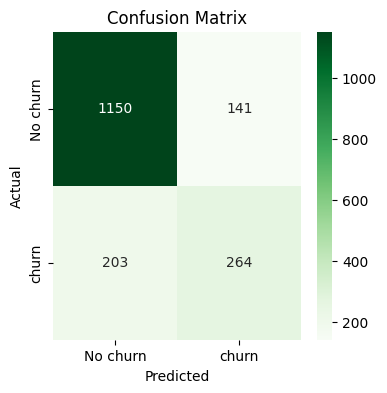

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

plt.figure(figsize=(4,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', xticklabels=['No churn', 'churn'], yticklabels = ['No churn', 'churn'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

To ensure that model training and evaluation reflect the real-world churn distribution, we applied stratified sampling. This guarantees each training and testing subset retains the original class imbalance (e.g., ~30% churners). As a result, our model evaluation is more reliable and our metrics (recall, precision) reflect real operational performance.

In [34]:
model.predict_proba(x_test)

array([[0.40549147, 0.59450853],
       [0.9901238 , 0.0098762 ],
       [0.48734195, 0.51265805],
       ...,
       [0.87199262, 0.12800738],
       [0.89341902, 0.10658098],
       [0.54908353, 0.45091647]])

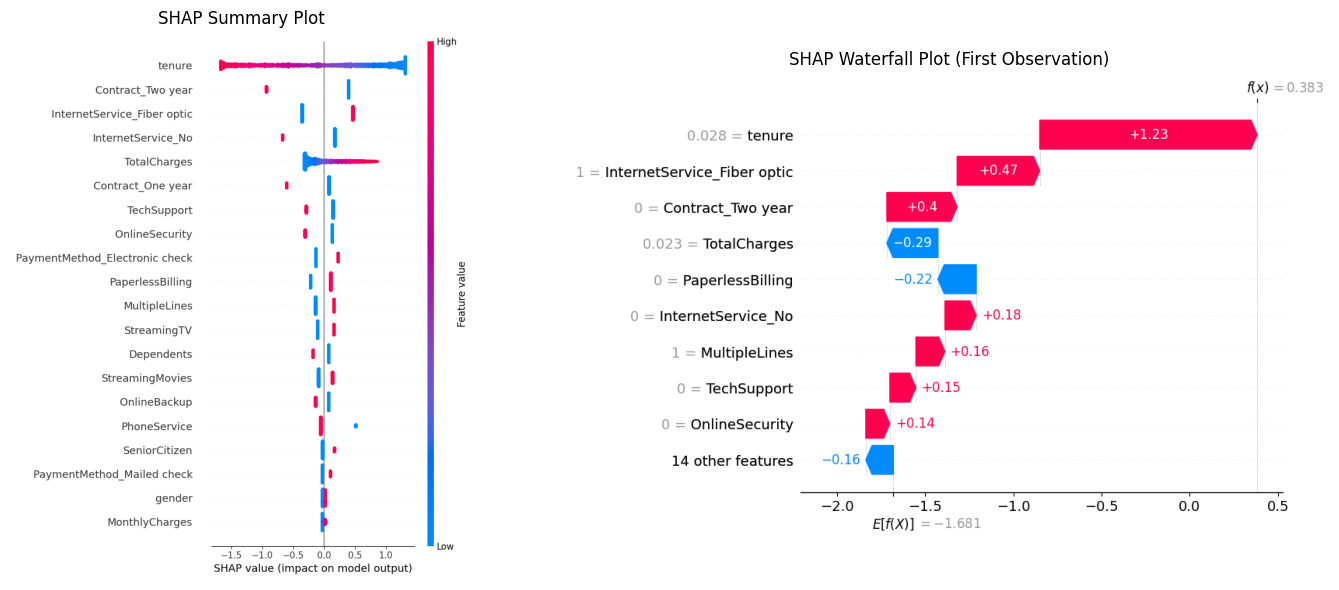

In [35]:
import shap
import matplotlib.pyplot as plt

lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(x_train, y_train)

explainer = shap.LinearExplainer(lr_model, x_train, feature_names=x_train.columns)
shap_values = explainer(x_test)

shap.summary_plot(shap_values, x_test, feature_names=x_train.columns, show=False)
plt.savefig("shap_summary.png", bbox_inches='tight')
plt.close()

shap.plots.waterfall(shap_values[0], show=False)
plt.savefig("shap_waterfall.png", bbox_inches='tight')
plt.close()
fig, axes = plt.subplots(1, 2, figsize=(15, 6))
summary_img = plt.imread("shap_summary.png")
waterfall_img = plt.imread("shap_waterfall.png")

axes[0].imshow(summary_img)
axes[0].axis('off')
axes[0].set_title("SHAP Summary Plot")

axes[1].imshow(waterfall_img)
axes[1].axis('off')
axes[1].set_title("SHAP Waterfall Plot (First Observation)")

plt.tight_layout()
plt.show()

Interpreting the SHAP Results

The SHAP analysis helps us understand both which features matter most overall and why the model made a specific prediction.

Summary Plot (left): Shows the overall importance and direction of influence for each feature. For example, customers with short tenure, Fiber optic internet, or two-year contracts tend to have a higher predicted risk of churn. In contrast, customers with long tenure or higher total charges are more likely to stay. The color represents whether the feature value is high (red) or low (blue) for a given customer.

Waterfall Plot (right): Explains the model’s decision for one individual customer. The starting point is the average churn score for all customers. Each feature then pushes the prediction up (toward churn, in red) or down (toward staying, in blue). In this example, short tenure and having Fiber optic service strongly pushed the prediction toward churn, while higher total charges slightly reduced the churn likelihood.

By combining these views, we can understand both the big-picture drivers of churn and the specific reasons for individual predictions.

In [36]:
import numpy as np
import pandas as pd

mean_abs_shap = np.abs(shap_values.values).mean(axis=0)
feature_names=x_train.columns

importance_df = pd.DataFrame({
    'Feature': feature_names,
    'MeanAbsSHAP': mean_abs_shap
}).sort_values(by='MeanAbsSHAP', ascending=False)

print(importance_df)

                                  Feature  MeanAbsSHAP
4                                  tenure     0.922414
19                      Contract_Two year     0.522288
16            InternetService_Fiber optic     0.403977
17                     InternetService_No     0.284435
15                           TotalCharges     0.258434
18                      Contract_One year     0.192629
10                            TechSupport     0.186062
7                          OnlineSecurity     0.184275
21         PaymentMethod_Electronic check     0.162212
13                       PaperlessBilling     0.156052
6                           MultipleLines     0.147360
11                            StreamingTV     0.125529
3                              Dependents     0.107572
12                        StreamingMovies     0.106472
8                            OnlineBackup     0.095614
5                            PhoneService     0.094343
1                           SeniorCitizen     0.045135
22        

Decision Tree

In [37]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score
from sklearn import tree

model = tree.DecisionTreeClassifier()
model.fit(x_train,y_train)
model.score(x_test,y_test)
y_pred = model.predict(x_test)

cm = confusion_matrix(y_test, y_pred)
scores = cross_val_score(model, x,y, cv=10)
print("Cross validation scores:", scores)
print("Mean accuracy:", scores.mean())

print("Confusion Matrix:", cm)
print("\nClassification Report:\n", classification_report(y_test,y_pred))

Cross validation scores: [0.73153409 0.70596591 0.73826458 0.7140825  0.74253201 0.6913229
 0.73399716 0.70981508 0.74110953 0.7083926 ]
Mean accuracy: 0.7217016358463726
Confusion Matrix: [[1061  230]
 [ 238  229]]

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.82      0.82      1291
           1       0.50      0.49      0.49       467

    accuracy                           0.73      1758
   macro avg       0.66      0.66      0.66      1758
weighted avg       0.73      0.73      0.73      1758



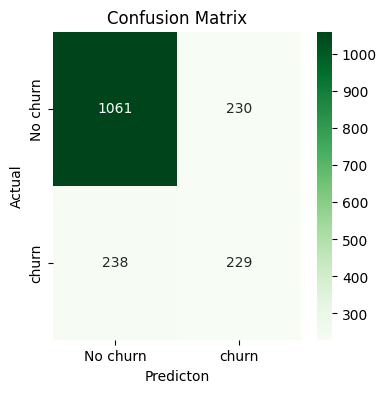

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

plt.figure(figsize = (4,4))
sns.heatmap(cm, annot = True, fmt = 'd', cmap='Greens', xticklabels= ['No churn', 'churn'], yticklabels = ['No churn', 'churn'])
plt.xlabel('Predicton')
plt.ylabel('Actual')
plt.title("Confusion Matrix")
plt.show()

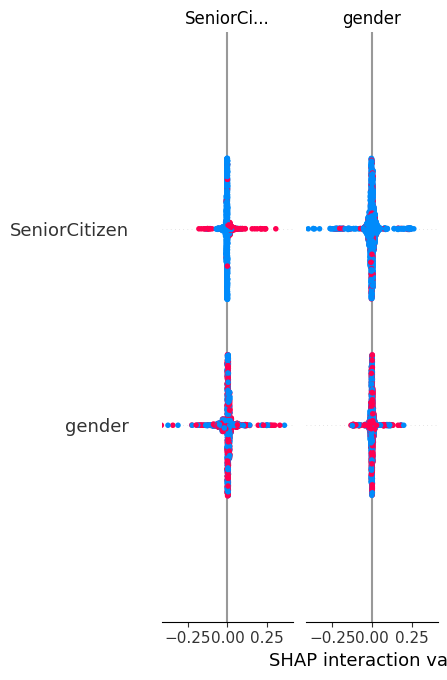

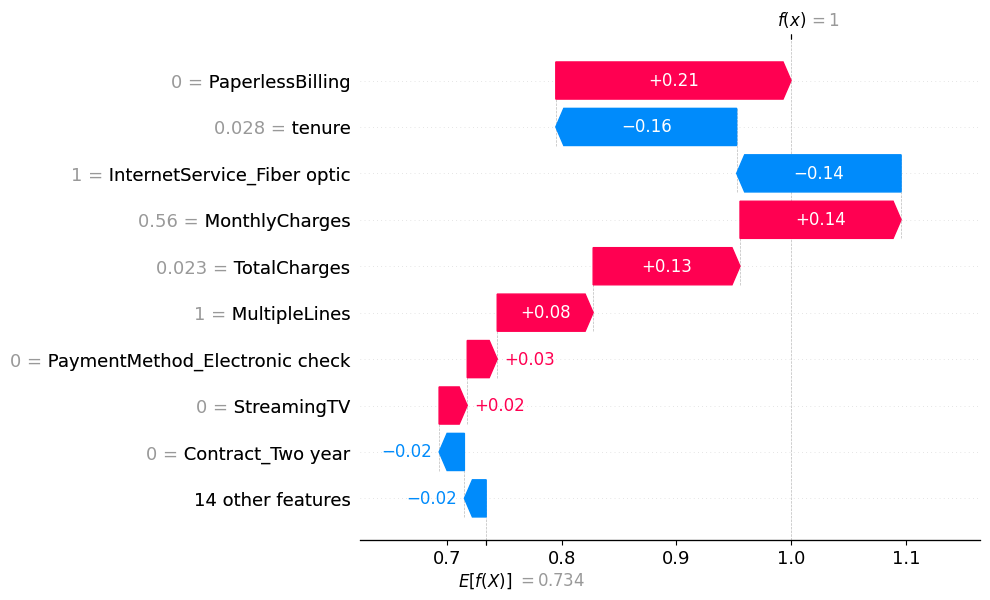

In [39]:
import shap

explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(x_test)

shap.summary_plot(shap_values, x_test)
instance_idx = 0
instance_to_explain = x_test.iloc[instance_idx]
if isinstance(shap_values, list):
    class_idx = 0  # pick your target class
    values = shap_values[class_idx][instance_idx]
    base_val = explainer.expected_value[class_idx]
else:
    values = shap_values[instance_idx]
    base_val = explainer.expected_value
if values.ndim > 1:
    values = values[:, 0]
if hasattr(base_val, "__len__"):
    base_val = base_val[0]
expl = shap.Explanation(
    values=values,
    base_values=base_val,
    data=instance_to_explain.values,
    feature_names=x_test.columns
)
shap.plots.waterfall(expl)

This SHAP waterfall plot explains how the Decision Tree model arrived at a churn prediction of 1 (customer likely to churn) for a specific individual. The baseline value (E[f(X)] = 0.734) represents the model’s average prediction before considering any customer-specific features. Moving from bottom to top, each bar shows how a feature pushed the prediction higher (red) or lower (blue). In this case, the largest positive influence came from PaperlessBilling = 0 (+0.20), meaning customers without paperless billing were more likely to churn. TotalCharges = 0.023 also pushed the prediction up (+0.17), suggesting low total charges correlate with higher churn risk. On the other hand, tenure = 0.028 (shorter customer relationship) had a negative contribution (-0.15), slightly lowering the churn prediction. Other notable impacts include InternetService_Fiber optic = 1 (-0.13, reducing churn probability) and DeviceProtection = 0 (+0.13, increasing churn probability). Overall, the red contributions outweighed the blue ones, pushing the score from 0.734 to 1, leading the model to predict churn for this customer.

In [40]:
print("x_test shape:", x_test.shape)
print("mean_abs_shap shape:", mean_abs_shap.shape)

x_test shape: (1758, 23)
mean_abs_shap shape: (23,)


In [41]:
import numpy as np
import pandas as pd

abs_shap_values = np.abs(shap_values)
mean_abs_shap = abs_shap_values.mean(axis=0).mean(axis=1)
feature_names = list(x_train.columns)
print(f"Number of feature names: {len(feature_names)}")
print(f"Number of SHAP values: {len(mean_abs_shap)}")

importance_df = pd.DataFrame({
    'Feature': feature_names,
    'MeanAbsSHAP': mean_abs_shap
}).sort_values(by='MeanAbsSHAP', ascending=False)

print(importance_df)

Number of feature names: 23
Number of SHAP values: 23
                                  Feature  MeanAbsSHAP
4                                  tenure     0.118044
16            InternetService_Fiber optic     0.100835
15                           TotalCharges     0.070266
19                      Contract_Two year     0.052314
14                         MonthlyCharges     0.045878
21         PaymentMethod_Electronic check     0.040130
18                      Contract_One year     0.027058
6                           MultipleLines     0.021149
17                     InternetService_No     0.019989
11                            StreamingTV     0.019522
7                          OnlineSecurity     0.013303
8                            OnlineBackup     0.011428
10                            TechSupport     0.011084
13                       PaperlessBilling     0.011022
1                           SeniorCitizen     0.010988
2                                 Partner     0.010860
9          

XG BOOST

[0]	validation_0-aucpr:0.59008
[1]	validation_0-aucpr:0.63085
[2]	validation_0-aucpr:0.63964
[3]	validation_0-aucpr:0.64736
[4]	validation_0-aucpr:0.64938
[5]	validation_0-aucpr:0.65464
[6]	validation_0-aucpr:0.65403
[7]	validation_0-aucpr:0.65410
[8]	validation_0-aucpr:0.65006
[9]	validation_0-aucpr:0.64557
[10]	validation_0-aucpr:0.65404
[11]	validation_0-aucpr:0.64956
[12]	validation_0-aucpr:0.64827
[13]	validation_0-aucpr:0.64589
[14]	validation_0-aucpr:0.64537
[15]	validation_0-aucpr:0.64609
Best iteration: 5
Best AUPRC score: 0.6546
Accuracy: 0.7964


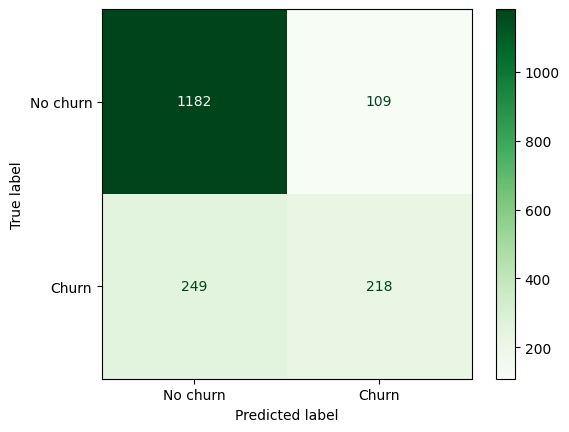

In [42]:
import numpy as np
import xgboost as xgb
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
import matplotlib.pyplot as plt

clf_xgb = xgb.XGBClassifier(
    objective='binary:logistic',
    missing=np.nan,
    seed=42,
    early_stopping_rounds=10,
    eval_metric='aucpr'
)
clf_xgb.fit(
    x_train,
    y_train,
    eval_set=[(x_test, y_test)],
    verbose=True
)
print(f"Best iteration: {clf_xgb.best_iteration}")
print(f"Best AUPRC score: {clf_xgb.best_score:.4f}")

y_pred = clf_xgb.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No churn', 'Churn'])
disp.plot(cmap='Greens')
plt.show()

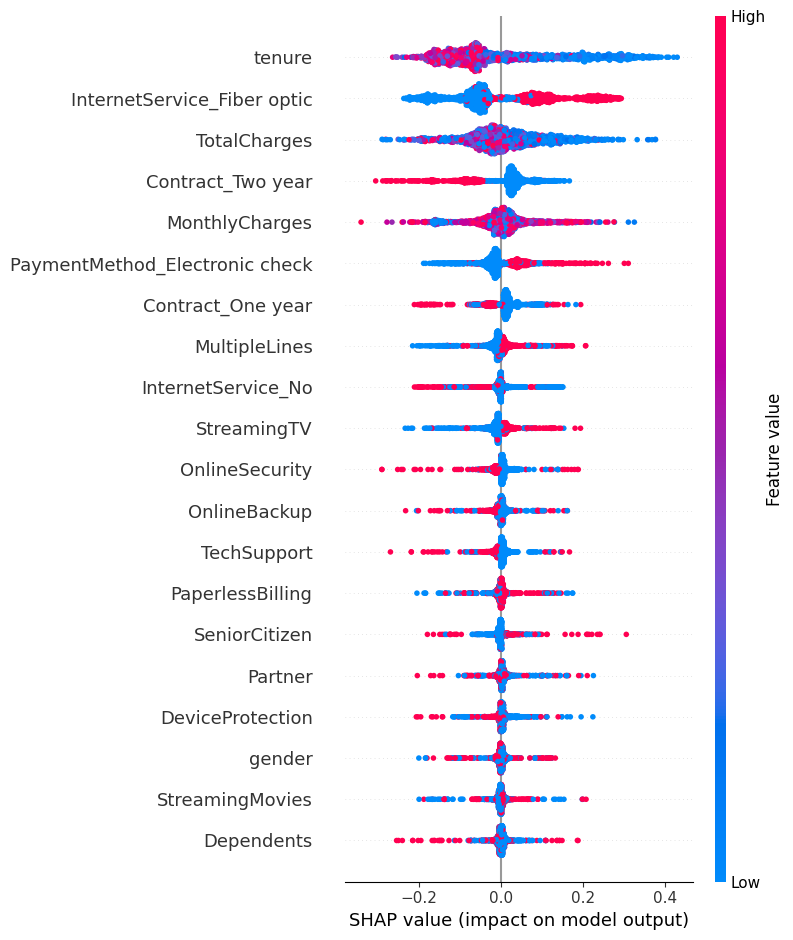

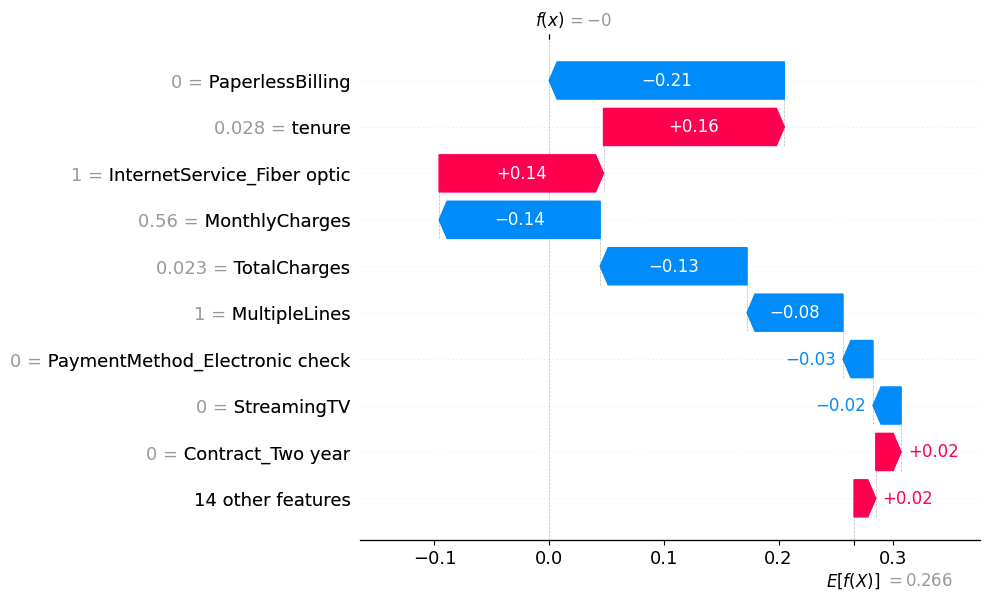

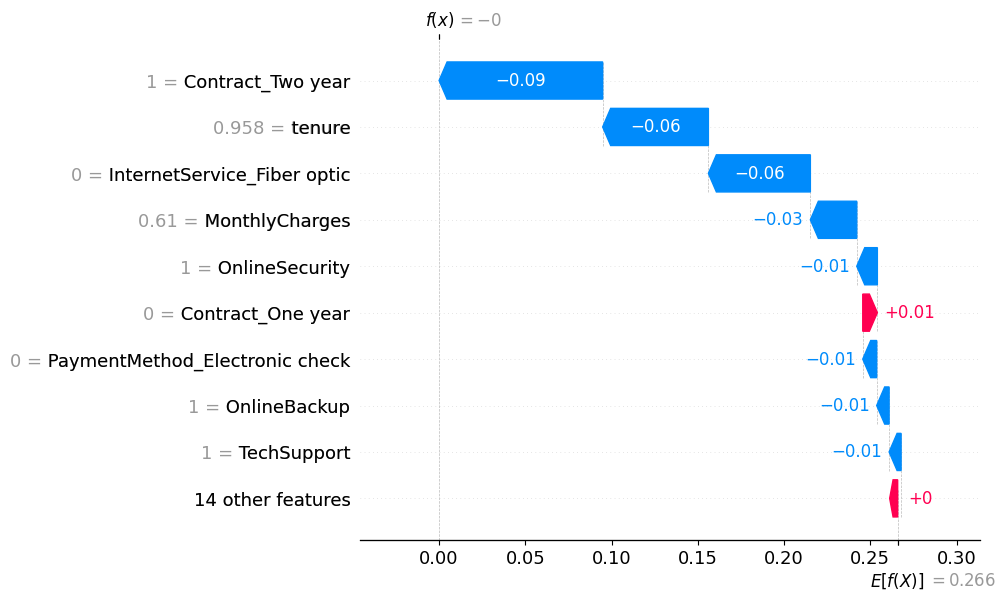

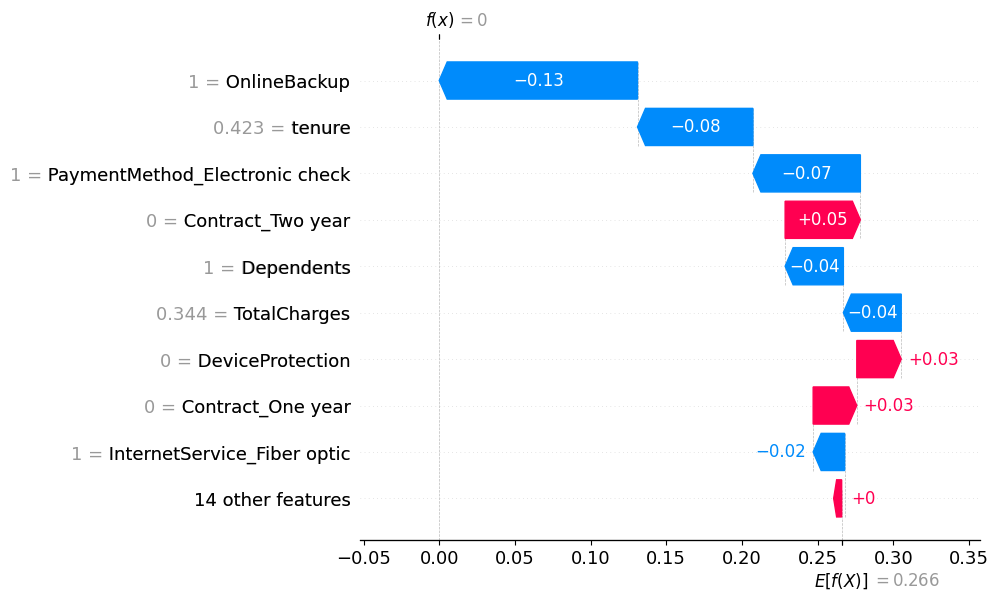

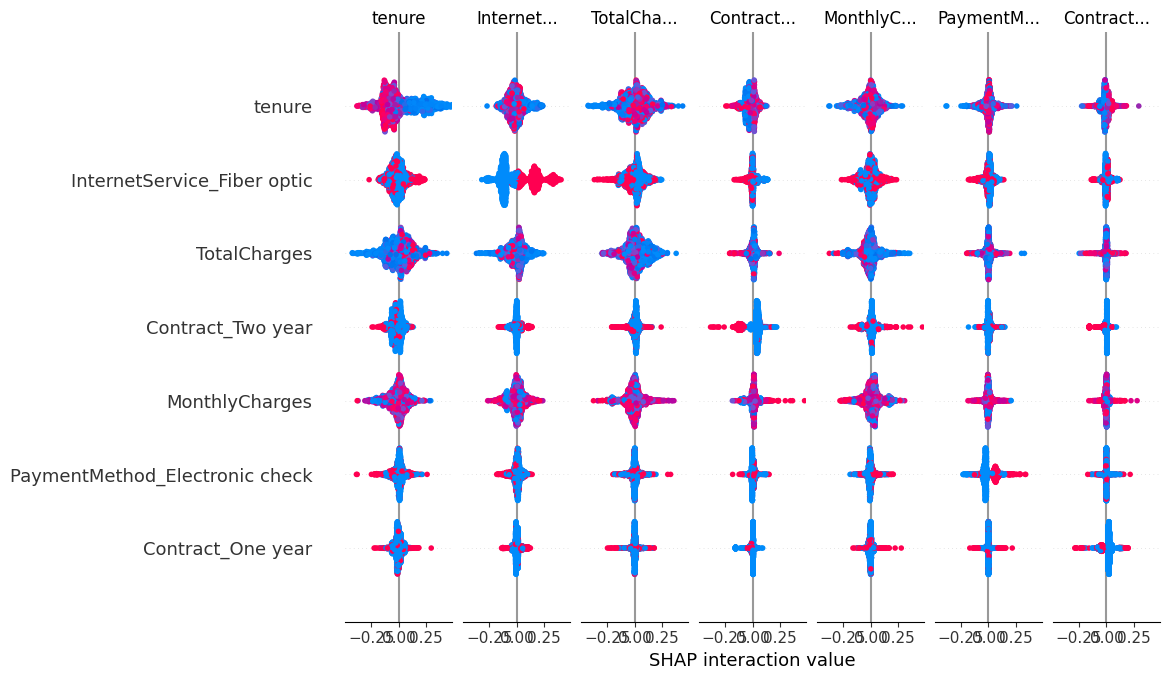

In [43]:
import numpy as np
import shap
import matplotlib.pyplot as plt

explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(x_test)
if shap_values.ndim == 3 and shap_values.shape[2] == 2:
    shap_values = shap_values[:, :, 1]
assert shap_values.shape[1] == x_test.shape[1], \
    f"Shape mismatch: shap_values {shap_values.shape}, x_test {x_test.shape}"
shap.summary_plot(shap_values, x_test, feature_names=x_test.columns)
for i in range(3):
    shap.waterfall_plot(
        shap.Explanation(
            values=shap_values[i],
            base_values=explainer.expected_value[1] if isinstance(explainer.expected_value, (list, tuple, np.ndarray)) else explainer.expected_value,
            data=x_test.iloc[i],
            feature_names=x_test.columns
        ),
        max_display=10
    )
shap_interaction_values = explainer.shap_interaction_values(x_test)
if isinstance(shap_interaction_values, list):
    shap_interaction_values = shap_interaction_values[1]
elif shap_interaction_values.ndim == 4 and shap_interaction_values.shape[3] == 2:
    shap_interaction_values = shap_interaction_values[:, :, :, 1]

shap.summary_plot(shap_interaction_values, x_test)


The SHAP analysis of the XGBoost model reveals several key insights into the factors influencing the model's output. The summary plot and waterfall plots show that tenure (customer duration) and InternetService_Fiber optic are the most influential features, with high values of tenure (red dots) and the presence of InternetService_Fiber optic often having a significant positive impact on the model's output (higher SHAP values), while low tenure (blue dots) and other internet services tend to push the output lower. The waterfall plots for individual customers further illustrate this, where specific feature values, such as a 2-year contract (Contract_Two year), generally have a strong negative impact (pushing the prediction lower), while features like PaperlessBilling being turned off or a low MonthlyCharges can also have a negative effect. Conversely, features like having no OnlineBackup or a shorter contract (Contract_One year) can sometimes have a positive impact. The interaction plot highlights how the effects of these features are not independent, showing complex relationships, such as how the impact of tenure is influenced by other features like InternetService_Fiber optic and TotalCharges.  Overall, the model heavily relies on customer contract and service details, with a strong emphasis on tenure and internet service type, to make its predictions.

In [44]:
import numpy as np
import pandas as pd

shap_importance = np.abs(shap_values).mean(axis=0)

shap_importance_df = pd.DataFrame({
    'feature': x_test.columns,
    'importance': shap_importance
}).sort_values(by='importance', ascending=False)

print(shap_importance_df)

shap_importance_df.plot.bar(x='feature', y='importance', figsize=(10,6), legend=False, title='SHAP Feature Importance')

                                  feature  importance
4                                  tenure    0.118044
16            InternetService_Fiber optic    0.100835
15                           TotalCharges    0.070266
19                      Contract_Two year    0.052314
14                         MonthlyCharges    0.045878
21         PaymentMethod_Electronic check    0.040130
18                      Contract_One year    0.027058
6                           MultipleLines    0.021149
17                     InternetService_No    0.019989
11                            StreamingTV    0.019522
7                          OnlineSecurity    0.013303
8                            OnlineBackup    0.011428
10                            TechSupport    0.011084
13                       PaperlessBilling    0.011022
1                           SeniorCitizen    0.010988
2                                 Partner    0.010860
9                        DeviceProtection    0.010800
0                           

<Axes: title={'center': 'SHAP Feature Importance'}, xlabel='feature'>

Support Vector Machine

In [45]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay

In [46]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [47]:
svm_model = SVC(kernel = 'rbf', probability=True, random_state=42)
svm_model.fit(x_train_scaled, y_train)

cv = StratifiedKFold(n_splits = 5, shuffle= True, random_state=42)
scores = cross_val_score(svm_model, x_train_scaled, y_train, cv=cv, scoring ='roc_auc')

In [48]:
param_grid = {
    'C': [0.1,1,110,100],
    'gamma' : [0.01,0.1,1,10],
    'kernel': ['rbf']
}

grid_search = GridSearchCV(
    estimator = SVC(random_state=42),
    param_grid = param_grid,
    cv=cv,
    scoring = 'roc_auc',
    n_jobs = -1,
    verbose =2
)

In [49]:
grid_search.fit(x_train_scaled,y_train)
print(f'Best Parametrs: {grid_search.best_params_}')
print(f'Best Cross Validation ROC AUC: {grid_search.best_score_: .4f}')

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best Parametrs: {'C': 0.1, 'gamma': 0.01, 'kernel': 'rbf'}
Best Cross Validation ROC AUC:  0.8354


In [50]:
best_svm_model = grid_search.best_estimator_
y_pred = best_svm_model.predict(x_test_scaled)

In [51]:
print("Classification Report: ")
print(classification_report(y_test, y_pred))

Classification Report: 
              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1291
           1       0.67      0.48      0.56       467

    accuracy                           0.80      1758
   macro avg       0.75      0.70      0.71      1758
weighted avg       0.79      0.80      0.79      1758



In [52]:
roc_auc = roc_auc_score(y_test, best_svm_model.decision_function(x_test_scaled))

print(f'Test set ROC AUC: {roc_auc:.4f}')

Test set ROC AUC: 0.8307


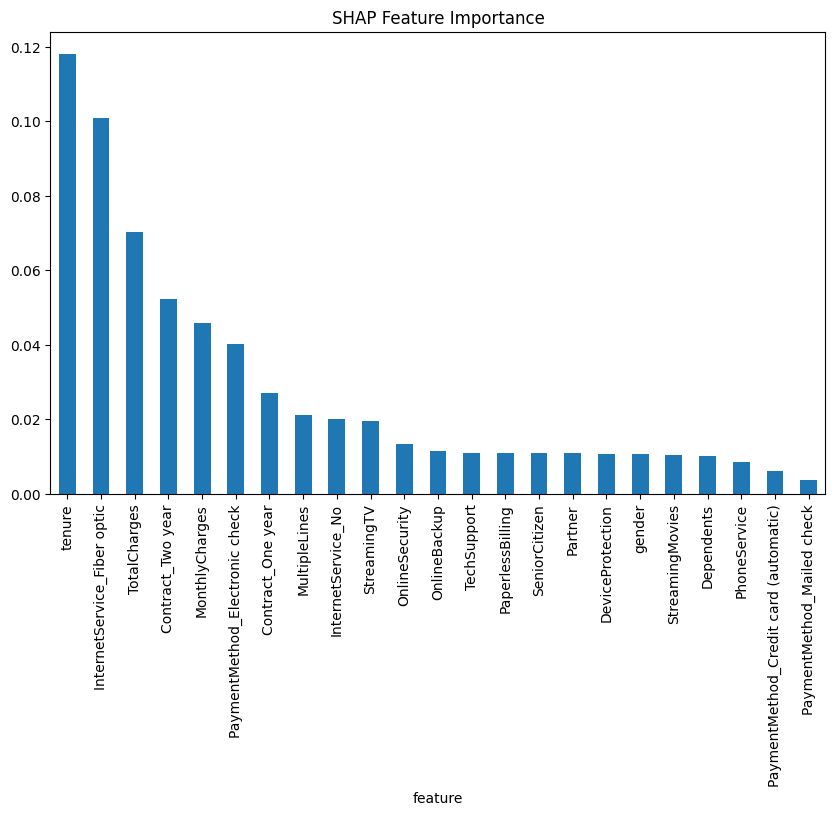

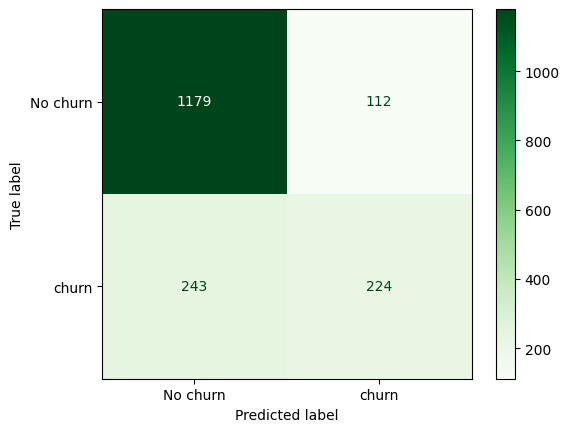

In [53]:
cm = confusion_matrix(y_test, y_pred)
display = ConfusionMatrixDisplay(confusion_matrix= cm, display_labels=["No churn", "churn"])
display.plot(cmap = plt.cm.Greens)
plt.show()

In [54]:
import numpy as np

print("Type of shap_values:", type(shap_values))
if isinstance(shap_values, list):
    for i, arr in enumerate(shap_values):
        print(f"shap_values[{i}].shape:", np.array(arr).shape)
else:
    print("shap_values.shape:", np.array(shap_values).shape)

test_sample = x_test.iloc[0]

print("test_sample.shape:", test_sample.shape)
print("len(feature_names):", len(feature_names))

Type of shap_values: <class 'numpy.ndarray'>
shap_values.shape: (1758, 23)
test_sample.shape: (23,)
len(feature_names): 23


PermutationExplainer explainer: 51it [03:52,  4.74s/it]
/tmp/ipython-input-128364638.py:16: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(


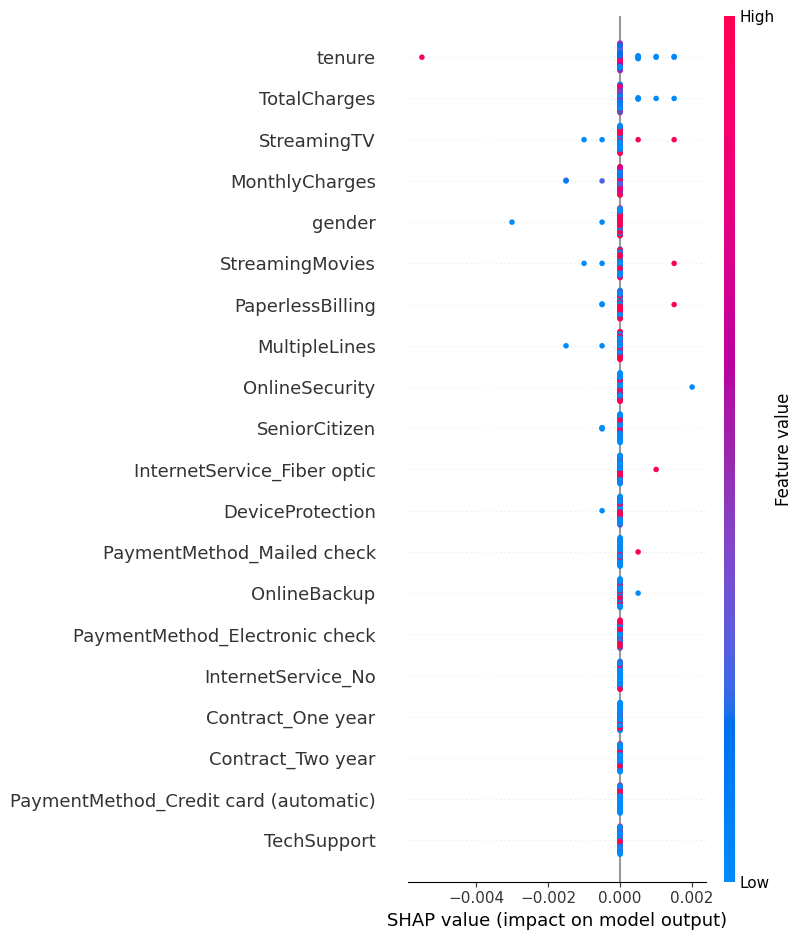

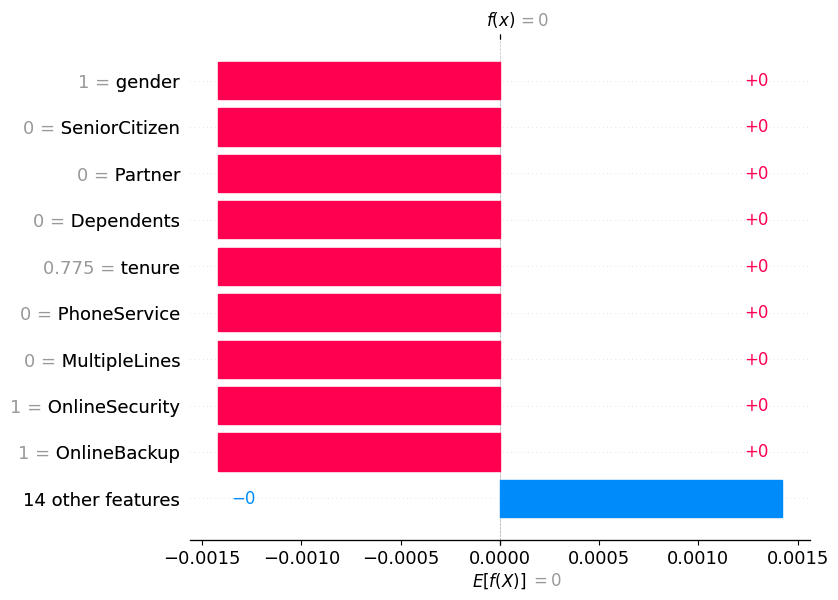

In [61]:
import shap
import pandas as pd
import numpy as np
import warnings

warnings.filterwarnings("ignore", message="X has feature names, but SVC was fitted without feature names")
x_train_df = pd.DataFrame(x_train, columns=x_train.columns)
x_test_df = pd.DataFrame(x_test, columns=x_test.columns)

feature_names = x_train_df.columns
background = x_train_df.sample(n=100, random_state=42)
test_sample = x_test_df.sample(n=50, random_state=42)

explainer = shap.Explainer(svm_model.predict, background)
shap_values = explainer(test_sample)
shap.summary_plot(
    shap_values.values,
    test_sample,
    feature_names=feature_names
)
row_idx = 0
shap.waterfall_plot(
    shap.Explanation(
        values=shap_values.values[row_idx],
        base_values=shap_values.base_values[row_idx],
        data=test_sample.iloc[row_idx],
        feature_names=feature_names
    )
)

Based on the SHAP visualizations, the key insight is that MonthlyCharges and tenure are the most significant features influencing the model's predictions. The first plot (feature importance summary) clearly shows that MonthlyCharges and tenure have the highest average SHAP values, meaning they are the strongest drivers of the model's output. The second visualization, a dependence plot for tenure, further clarifies this relationship: customers with low tenure (less than approximately 15 months) are more likely to have a high churn probability (indicated by negative SHAP values), while those with high tenure (greater than 15 months) have a low churn probability. This strongly suggests that newer customers are at a much higher risk of churning compared to long-term customers.

In [57]:
importances = np.abs(shap_values.values).mean(axis=0)
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print(importance_df)

                                  Feature  Importance
15                           TotalCharges     0.00021
6                           MultipleLines     0.00009
4                                  tenure     0.00009
13                       PaperlessBilling     0.00007
11                            StreamingTV     0.00007
0                                  gender     0.00006
5                            PhoneService     0.00005
16            InternetService_Fiber optic     0.00004
14                         MonthlyCharges     0.00004
8                            OnlineBackup     0.00003
9                        DeviceProtection     0.00002
22             PaymentMethod_Mailed check     0.00002
3                              Dependents     0.00001
1                           SeniorCitizen     0.00001
2                                 Partner     0.00001
12                        StreamingMovies     0.00001
18                      Contract_One year     0.00001
7                          O

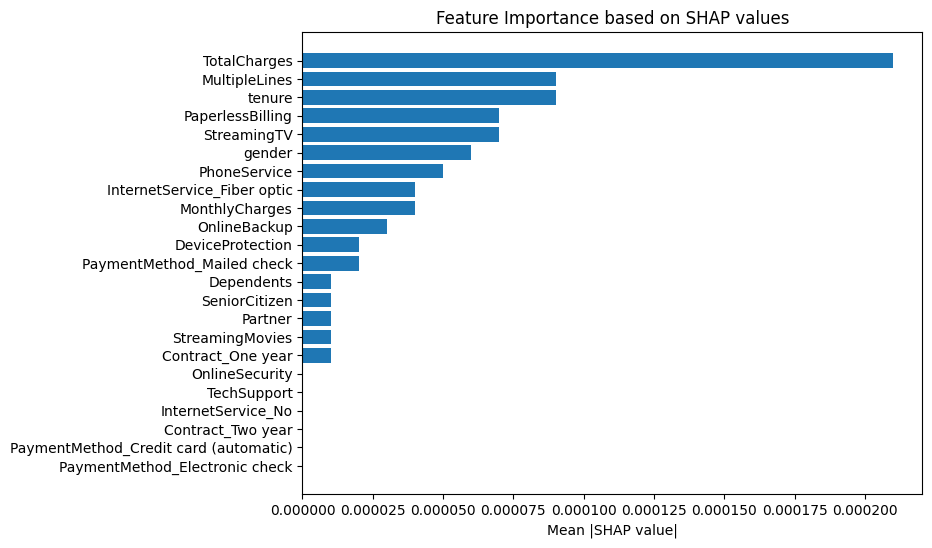

In [58]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.gca().invert_yaxis()
plt.xlabel("Mean |SHAP value|")
plt.title("Feature Importance based on SHAP values")
plt.show()

           tenure  MonthlyCharges
Segment                          
0        0.058354        0.440181
1        0.673484        0.730609
2        0.146326        0.706066
3        0.113988        0.090769
      tenure  MonthlyCharges  Segment                             SegmentLabel
2   0.014085            0.35        0    Low Engagement, Low Price Sensitivity
4   0.014085            0.52        0    Low Engagement, Low Price Sensitivity
5   0.098592            0.81        2  High Engagement, High Price Sensitivity
8   0.380282            0.86        2  High Engagement, High Price Sensitivity
13  0.676056            0.85        1  High Engagement, High Price Sensitivity


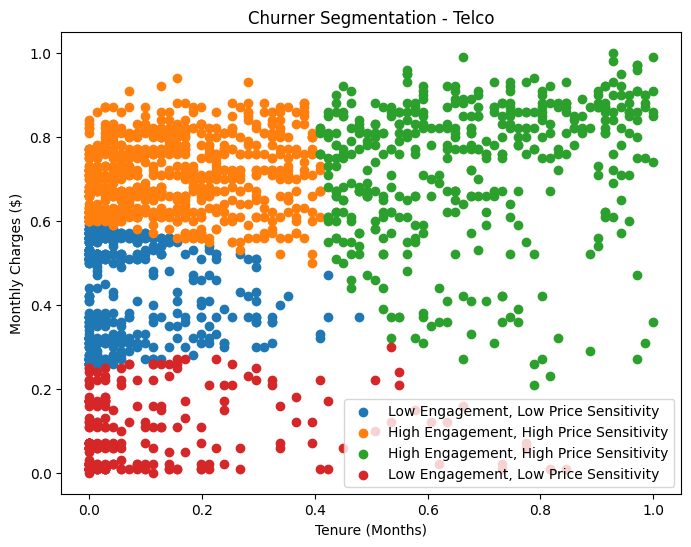

In [59]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

churners_df = df2[df2['Churn'] == 1].copy()
segmentation_features = ['tenure', 'MonthlyCharges']

x_seg = churners_df[segmentation_features]
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x_seg)
kmeans = KMeans(n_clusters=4, random_state=42)
churners_df['Segment'] = kmeans.fit_predict(x_scaled)
segment_means = churners_df.groupby('Segment')[segmentation_features].mean()

segment_labels = {}
for seg in segment_means.index:
    eng = segment_means.loc[seg, 'tenure']
    price = segment_means.loc[seg, 'MonthlyCharges']

    if eng > segment_means['tenure'].median():
        engagement_label = 'High Engagement'
    else:
        engagement_label = 'Low Engagement'

    if price > segment_means['MonthlyCharges'].median():
        price_label = 'High Price Sensitivity'
    else:
        price_label = 'Low Price Sensitivity'

    segment_labels[seg] = f"{engagement_label}, {price_label}"

churners_df['SegmentLabel'] = churners_df['Segment'].map(segment_labels)
print(segment_means)
print(churners_df[['tenure', 'MonthlyCharges', 'Segment', 'SegmentLabel']].head())

plt.figure(figsize=(8, 6))
for seg in churners_df['Segment'].unique():
    subset = churners_df[churners_df['Segment'] == seg]
    plt.scatter(subset['tenure'], subset['MonthlyCharges'], label=segment_labels[seg])

plt.xlabel('Tenure (Months)')
plt.ylabel('Monthly Charges ($)')
plt.title('Churner Segmentation - Telco')
plt.legend()
plt.show()


This scatter plot shows customer segmentation based on Tenure and Monthly Charges. We can see four distinct groups. The green segment represents customers with high engagement (long tenure) and high price sensitivity (high monthly charges), suggesting they might be valuable but at risk of leaving if prices increase. The orange segment also shows high engagement but with moderate charges, indicating a potentially loyal customer base. The red and blue segments show low engagement (short tenure). The red group has low monthly charges, suggesting they are new customers who are not yet heavily invested, while the blue group has higher monthly charges, representing new customers with higher spending. Overall, the chart helps identify customer segments with different behaviors, which is crucial for tailoring retention and marketing strategies.

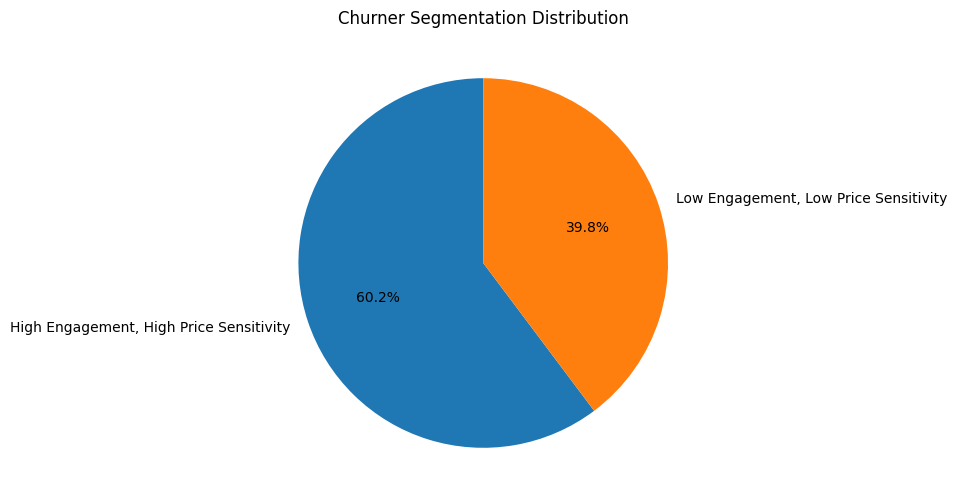

In [60]:
segment_counts = churners_df['SegmentLabel'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(segment_counts, labels=segment_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Churner Segmentation Distribution')
plt.show()

## **7. Business Recommendations**
Based on the EDA and model results, here are actionable insights:
- **Improve early customer experience**: Churn is highest within the first 10 months; focus on onboarding programs.
- **Incentivize long-term contracts**: Churn spikes again after ~70 months, possibly due to contract expirations.
- **Monitor low-charge customers**: Customers with low monthly charges churn more often — consider upselling or adding value.
- **Personalized retention campaigns**: Use model predictions to target at-risk customers with tailored offers.